## `Collatz Conjecture investigation`

`The Collatz Conjecture is one in which you can start from any positive integer n. If n is even, you divide n by 2, if n is odd, you multiply by 3 and add 1. With every number that has been tested with the world’s current computer power, every number will end up at 1, and there on get stuck in the loop: 4, 2, 1, 4, 2, 1... etc. It is still yet to prove whether every number will end up at 1.`


$$
\begin{equation}
  C(n)=\begin{cases}
    1, & \text{if n =1}\\
    C(\frac{n}{2}), & \text{if n is even}\\
    C(3n+1), & \text{if n is odd}
  \end{cases}
\end{equation}
$$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import math

The program below performs the function $C(n)$ on any number inputted

In [2]:
def collatz(x):
    collatz_list=[x]
    while x!=1:
        if x%2==0:
            x/=2
        else:
            x=3*x+1
        collatz_list.append(int(x))
    return collatz_list

-

Testing the Collatz function with $n=26$:

In [3]:
print (collatz(26))
print ("Number of iterations to get to 1: ", len(collatz(26)))

[26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]
Number of iterations to get to 1:  11


 The function takes the starting number, in this case $26$, and applies one of the two functions to it depending on whether it is odd or even

-

Testing the Collatz function with $n=27$:

In [4]:
print (collatz(27))
print ("Number of iterations to get to 1: ", len(collatz(27)))

[27, 82, 41, 124, 62, 31, 94, 47, 142, 71, 214, 107, 322, 161, 484, 242, 121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 4616, 2308, 1154, 577, 1732, 866, 433, 1300, 650, 325, 976, 488, 244, 122, 61, 184, 92, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]
Number of iterations to get to 1:  112


Big difference in the number of interations between $26$ and $27$ ...

-

To visualise the graph, with the number being inputted into the function against the number of iterations to get to one:

In [5]:
x = []
y= []
for i in range(1,1000,1):
    x.append(i)
    y.append(len(collatz(i)))

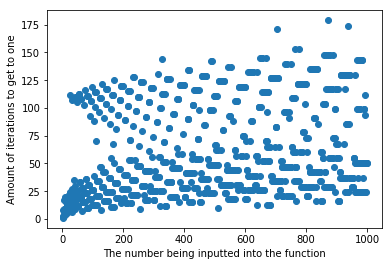

In [6]:
plt.scatter(x, y)
plt.xlabel("The number being inputted into the function")
plt.ylabel("Amount of iterations to get to one")

plt.show()

Unexpected graph...

-

Scaling the graph down:

In [7]:
x2 = []
y2 = []
for i in range(1,51,1):
    x2.append(i)
    y2.append(len(collatz(i)))

Text(0,0.5,'Amount of iterations to get to one')

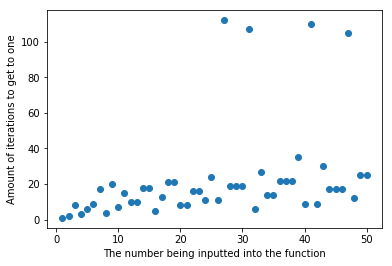

In [8]:
plt.scatter(x2,y2)
plt.xlabel("The number being inputted into the function")
plt.ylabel("Amount of iterations to get to one")

-

What's so special about those numbers?

The program below identifies outliers by identifying if the number of interations is more than 2 standard deviaations 

In [9]:
elements = np.array(y2)

mean = np.mean(elements, axis=0)
sd = np.std(elements, axis=0)

final_list = [x for x in y2 if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x > mean + 2 * sd)]
for element in range(len(final_list)):
    index=y2.index(final_list[element])
    print("Starting value:{} |  Iterations: {}".format(x2[index],final_list[element]))

Starting value:27 |  Iterations: 112
Starting value:31 |  Iterations: 107
Starting value:41 |  Iterations: 110
Starting value:47 |  Iterations: 105


In [10]:
collatz27=collatz(27)
collatz31=collatz(31)
collatz41=collatz(41)
collatz47=collatz(47)

for eachIteration in range(len(collatz27)):
    if collatz27[eachIteration] in collatz31:
        collatz27[eachIteration]="{}*MEETS COLLATZ(31)".format(collatz27[eachIteration])
        break
for eachIteration in range(len(collatz27)):
    if collatz27[eachIteration] in collatz41:
        collatz27[eachIteration]="{}*MEETS COLLATZ(41)".format(collatz27[eachIteration])
        break
for eachIteration in range(len(collatz27)):
    if collatz27[eachIteration] in collatz47:
        collatz27[eachIteration]="{}*MEETS COLLATZ(47)".format(collatz27[eachIteration])
        break
print(collatz27)

[27, 82, '41*MEETS COLLATZ(41)', 124, 62, '31*MEETS COLLATZ(31)', 94, '47*MEETS COLLATZ(47)', 142, 71, 214, 107, 322, 161, 484, 242, 121, 364, 182, 91, 274, 137, 412, 206, 103, 310, 155, 466, 233, 700, 350, 175, 526, 263, 790, 395, 1186, 593, 1780, 890, 445, 1336, 668, 334, 167, 502, 251, 754, 377, 1132, 566, 283, 850, 425, 1276, 638, 319, 958, 479, 1438, 719, 2158, 1079, 3238, 1619, 4858, 2429, 7288, 3644, 1822, 911, 2734, 1367, 4102, 2051, 6154, 3077, 9232, 4616, 2308, 1154, 577, 1732, 866, 433, 1300, 650, 325, 976, 488, 244, 122, 61, 184, 92, 46, 23, 70, 35, 106, 53, 160, 80, 40, 20, 10, 5, 16, 8, 4, 2, 1]


Since 27 has the longest list, the code above compares the list of iterations for 27, to the lists for 31, 41, and 47, and it identifies where the the collatz conjecture meets. So for example, the Collatz list for 27, includes 41 on the 3rd iteration, so from there the pattern is the same for 41 and 27 and so on for  31, and 47.

-

What other patterns could there be?

The code below identifies the first power of 2 that each numbers go through

In [11]:
tallyList, usefulListOfNumbers, powersList=[],[],[]

def powerFunction(base, powersUpTo, collatzUpTo):
    tallyList, usefulListOfNumbers, powersList=[],[],[]
    for i in range(0, powersUpTo+1):
        usefulListOfNumbers.append(i)
        tallyList.append(0)
        powersList.append(base**i)
    for i in range(1,collatzUpTo): 
        collatzIterations=collatz(i) 
        for x in collatzIterations: 
            if x in powersList: 
                powerListIndex=int(math.log(x,base)) 
                tallyList[powerListIndex]+=1 
                break 
    for i in range(0,len(tallyList)):
        print("{}^{} = {}, Occurances: {}".format(base,i, powersList[i],tallyList[i]))
    return tallyList, usefulListOfNumbers

In [12]:
tallyList, usefulListOfNumbers=powerFunction(2,12,6000)

2^0 = 1, Occurances: 1
2^1 = 2, Occurances: 1
2^2 = 4, Occurances: 1
2^3 = 8, Occurances: 1
2^4 = 16, Occurances: 5634
2^5 = 32, Occurances: 1
2^6 = 64, Occurances: 10
2^7 = 128, Occurances: 1
2^8 = 256, Occurances: 142
2^9 = 512, Occurances: 1
2^10 = 1024, Occurances: 200
2^11 = 2048, Occurances: 1
2^12 = 4096, Occurances: 5


16 seems to be the first power of 2 which the majority of the numbers go through first


To visualise the graph:

<BarContainer object of 13 artists>

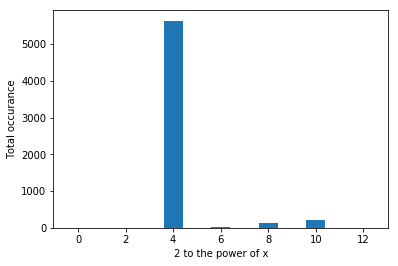

In [13]:
plt.xlabel("2 to the power of x")
plt.ylabel("Total occurance")
plt.bar(usefulListOfNumbers,tallyList)

-

The steps for the first few powers of 2:

In [14]:
print (collatz(2))
print (len(collatz(2))-1)

[2, 1]
1


$2^{1} = 2 \Longrightarrow 1$ iteration to get to 1

-

In [15]:
print (collatz(4))
print (len(collatz(4))-1)

[4, 2, 1]
2


$2^{2} = 4 \Longrightarrow 2$ iterations to get to 1

-

In [16]:
print (collatz(8))
print (len(collatz(8))-1)

[8, 4, 2, 1]
3


$2^{3} = 8 \Longrightarrow 3$ iterations to get to 1

-

 Notice how whatever the power of 2 is, that's the amount of iterations for that number to get to 1

What about 2 with a big power?

In [17]:
print (collatz(33554432))
print (len(collatz(33554432))-1)

[33554432, 16777216, 8388608, 4194304, 2097152, 1048576, 524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]
25


$2^{25} = 33554432 \Longrightarrow 25$ iterations to get to 1

-

$\therefore$ to generalise this result:

If $n$ is even and a power of $2$ where, $n=2^{k}$, and $k$ $\in$ $\mathbb{N}$, then the steps for $C(n):$ is $C(2^{k})=k$ and therefore $C(2^{k+1})=k+1$... and so forth


-

Take $C(n)$ to be a single iteration of the Collatz function on $n$, $n \in \mathbb{N}$.

Take the probability that $C(n)$ is even by just $P(C(n))$

To start at a random number, $P(C(n))= \frac{1}{2}$ (only as $n$ is even)

Let's try to find the probability that you get an even number on the kth iteration

In [18]:
def calcEvenProb(oldList):
    newProbList=[]
    for eachLetter in oldList:
        if eachLetter=="E":
            newProbList.append("E")
            newProbList.append("O")
        else:
            newProbList.append("E")
            newProbList.append("E")
    return newProbList
n = ["E", "O"]

In [19]:
def evenProbUpTo(maximum):
    listOfProbs=[]
    listOfDecimals=[]
    for i in range(0,maximum):
        n = ["E", "O"]
        for x in range(0,i,1):
            n=calcEvenProb(n)
        numerator=n.count("E")
        denominator=len(n)
        listOfProbs.append("{}/{}".format(numerator,denominator))
        listOfDecimals.append(numerator/denominator)
    return listOfProbs, listOfDecimals

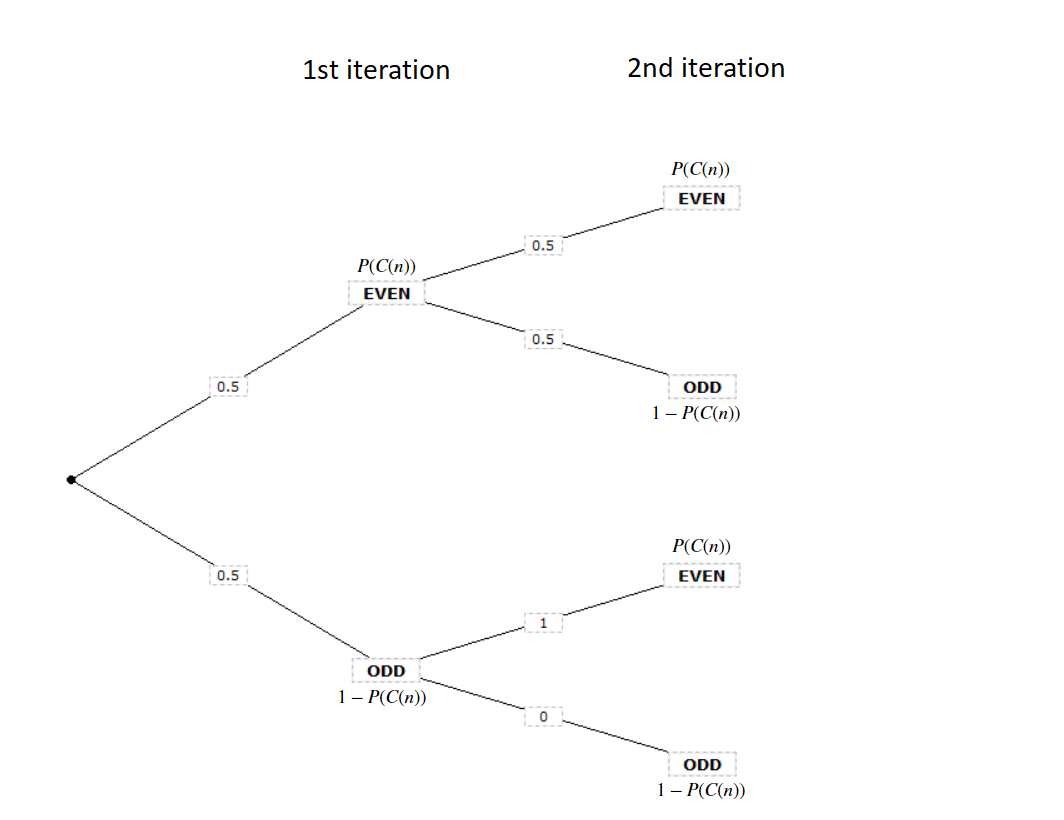

Using the above probability tree diagram, the probability that we end up with an even number on the 2nd iteration is: 

$ P(C^{2}(n)) = [P(C(n))$ x $P(C(n))] + [(1-P(C(n)))$ x $P(C(n))$]

$ \equiv [\frac{1}{2} * \frac{1}{2}] + [\frac{1}{2} * 1] $

$ \equiv \frac{3}{4} $

-

The program below calculates the probabilities of getting an even number for the $k$th iteration

In [20]:
print(evenProbUpTo(8)[0])

['1/2', '3/4', '5/8', '11/16', '21/32', '43/64', '85/128', '171/256']


$$ \frac{1}{2} \longrightarrow \frac{3}{4} \longrightarrow \frac{5}{8} \longrightarrow \frac{11}{16} \longrightarrow \frac{21}{32} \longrightarrow \frac{43}{64} \longrightarrow \frac{85}{128} \longrightarrow \frac{171}{256}$$

-

Notice the pattern in the probabilities..

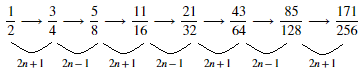

The denominators of the fractions are powers of $2$: ($2^{1},2^{2},2^{3}...$)

The numerators however have an alternating pattern: starting with $1$, apply $2n+1$ which gives $3$. Then apply $2n-1$ to $3$, gives $5$. Then applying $2n+1$ to $5$, gives you $11$ and so forth...

-

What do these fractions actually mean?


By converting the fractions into decimals...

In [21]:
for i in evenProbUpTo(14)[1]:
    print(i,end="\n")

0.5
0.75
0.625
0.6875
0.65625
0.671875
0.6640625
0.66796875
0.666015625
0.6669921875
0.66650390625
0.666748046875
0.6666259765625
0.66668701171875


As $n \rightarrow \infty$ the probability that the $k$th iteration is even [$P(C(n))$] tends more to $\frac{2}{3}$, meaning you are more likely to get an even number than an odd number

When you have an even number the function: $\frac{n}{2}$ is applied, which contracts the number, making it smaller. But when you have an odd number, the function $3n+1$ is applied, which increases the number.

So since you are more likely to get an even number, you are more likely to contract the number, than increase it, thus increasing the likelihood that you decrease enough to a number which has already been proved to reach 1